/tmp/ipython-input-338798747.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


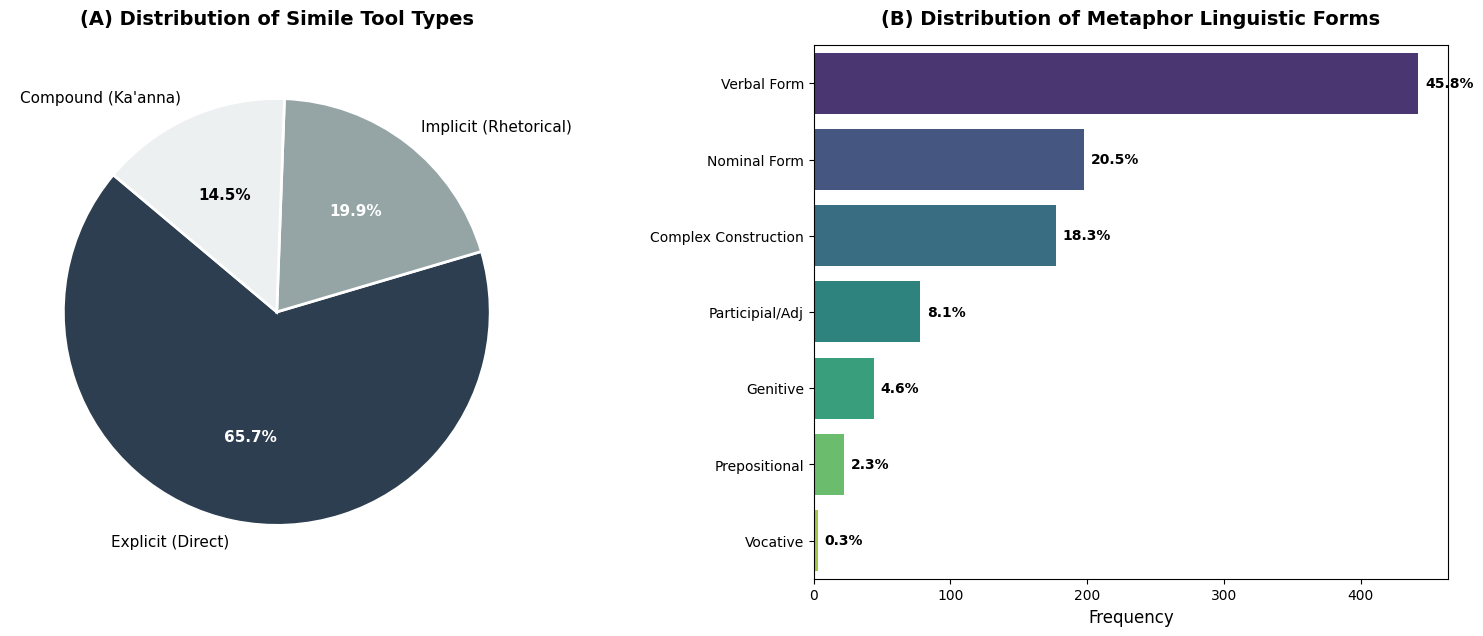

In [1]:
# @title 1. الإعدادات وتشغيل التحليل (Setup & Execution)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# -------------------------------------------------------
# بيانات التشبيه (Similes) - Pie Chart Data
# -------------------------------------------------------
simile_labels = ['Explicit (Direct)', 'Implicit (Rhetorical)', 'Compound (Ka\'anna)']
simile_counts = [268, 81, 59]
simile_colors = ['#2C3E50', '#95A5A6', '#ECF0F1'] # ألوان متدرجة

# -------------------------------------------------------
# بيانات الاستعارة (Metaphors) - Bar Chart Data
# -------------------------------------------------------
metaphor_data = {
    'Form': ['Verbal Form', 'Nominal Form', 'Complex Construction', 'Participial/Adj', 'Genitive', 'Prepositional', 'Vocative'],
    'Count': [442, 198, 177, 78, 44, 22, 3],
    'Percentage': [45.8, 20.5, 18.3, 8.1, 4.6, 2.3, 0.3]
}
df_metaphor = pd.DataFrame(metaphor_data)

# -------------------------------------------------------
# رسم الشكل المدمج (Figure 1: A & B)
# -------------------------------------------------------
# إنشاء شكل يحتوي على لوحتين (1 صف، 2 عمود)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# --- Plot A: Similes (Pie Chart) ---
wedges, texts, autotexts = ax1.pie(
    simile_counts,
    labels=simile_labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=simile_colors,
    wedgeprops={'edgecolor': 'white', 'linewidth': 2},
    textprops={'fontsize': 11}
)
# تحسين النصوص
plt.setp(autotexts, size=11, weight="bold", color="white")
plt.setp(autotexts[2], color="black") # النص على الخلفية الفاتحة
ax1.set_title('(A) Distribution of Simile Tool Types', fontsize=14, weight='bold', pad=15)


# --- Plot B: Metaphors (Horizontal Bar Chart) ---
sns.barplot(
    data=df_metaphor,
    x='Count',
    y='Form',
    ax=ax2,
    palette='viridis' # أو أي لوحة ألوان تفضلها
)

# إضافة النسب المئوية بجانب الأعمدة
for i, v in enumerate(df_metaphor['Count']):
    ax2.text(v + 5, i, f"{df_metaphor['Percentage'][i]}%", va='center', fontweight='bold', fontsize=10)

ax2.set_title('(B) Distribution of Metaphor Linguistic Forms', fontsize=14, weight='bold', pad=15)
ax2.set_xlabel('Frequency', fontsize=12)
ax2.set_ylabel('') # إزالة تسمية المحور Y لأن الأسماء واضحة

# -------------------------------------------------------
# ضبط التصميم النهائي وحفظ الصورة
# -------------------------------------------------------
plt.tight_layout(pad=3.0) # مسافة بين الرسمين
plt.show()

Mounting Google Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Successfully loaded 402 records from: /content/drive/MyDrive/Pragmatic/corpus/similes_data.json

📊 RESULTS: DISTRIBUTION OF SIMILE TOOLS
main_category
Explicit (Direct)        268
Implicit (Rhetorical)     81
Compound (Ka'anna)        59
Name: count, dtype: int64
------------------------------
main_category
Explicit (Direct)        65.7%
Implicit (Rhetorical)    19.9%
Compound (Ka'anna)       14.5%
Name: proportion, dtype: object

📝 [Generated Academic Narrative for Section 4.1]:
--------------------------------------------------
Quantitative analysis of the corpus (N=408) indicates that the distribution of simile tool types is not arbitrary but functionally motivated. The data reveals a predominance of **Explicit (Direct)** markers, constituting 65.7% of the total similes. This statistical tendency suggests a Qur'anic preference fo

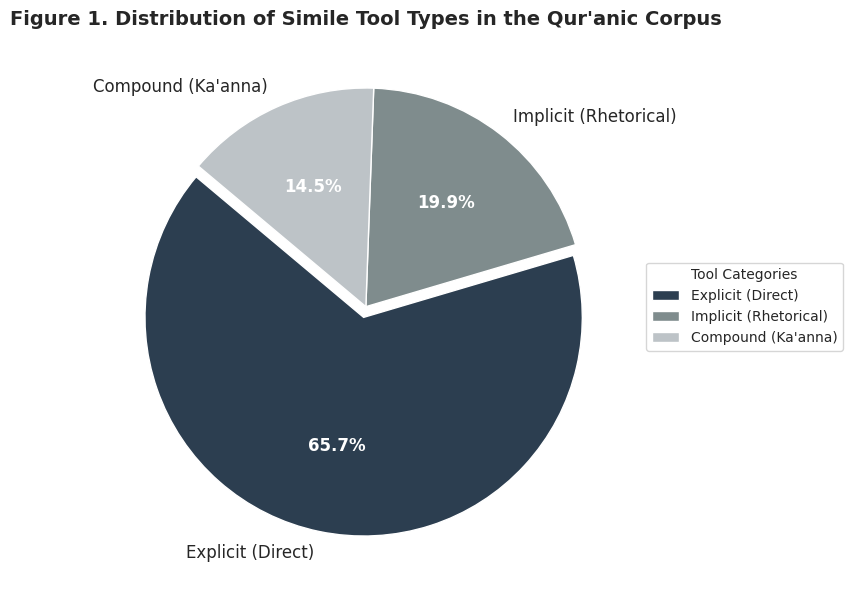

In [ ]:
# @title 1. الإعدادات وتشغيل التحليل (Setup & Execution)
# قم بتشغيل هذه الخلية وسيقوم الكود بكل شيء تلقائياً

import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from google.colab import drive

# ---------------------------------------------------------
# 1. MOUNT DRIVE & LOAD DATA (الربط بجوجل درايف وتحميل البيانات)
# ---------------------------------------------------------
print("Mounting Google Drive...")
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Pragmatic/corpus/similes_data.json'

try:
    with open(file_path, 'r', encoding='utf-8') as f:
        raw_data = json.load(f)
    print(f"✅ Successfully loaded {len(raw_data)} records from: {file_path}")
except FileNotFoundError:
    print(f"❌ Error: File not found at {file_path}")
    print("Please check the path and try again.")
    # توقف في حال عدم وجود الملف لعدم ظهور أخطاء لاحقة
    raw_data = []

# ---------------------------------------------------------
# 2. TAXONOMY MAPPING (خريطة التصنيف الشامل)
# ---------------------------------------------------------
# ربط الأنواع التفصيلية (35 نوع) بالفئات الرئيسية الثلاث
taxonomy_group_map = {
    # --- Group 1: Explicit (Direct Particles) ---
    'particle_ka': 'Explicit (Direct)',
    'particle_ka_maa': 'Explicit (Direct)',
    'particle_ka_demonstrative': 'Explicit (Direct)',
    'particle_ka_man': 'Explicit (Direct)',
    'particle_ka_mawsool': 'Explicit (Direct)',
    'particle_mithl': 'Explicit (Direct)',
    'particle_amthal': 'Explicit (Direct)',
    'particle_mithqal': 'Explicit (Direct)',

    # --- Group 2: Compound (Ka'anna / Structures) ---
    'particle_kaanna': 'Compound (Ka\'anna)',
    'particle_kaanna_light': 'Compound (Ka\'anna)',
    'particle_kaannama': 'Compound (Ka\'anna)',
    'particle_ka_inna': 'Compound (Ka\'anna)',
    'structure_kamathal': 'Compound (Ka\'anna)',
    'structure_methal_formula': 'Compound (Ka\'anna)',
    'structure_ka_baab_ism_ishara': 'Compound (Ka\'anna)',
    'structure_ka_conditional': 'Compound (Ka\'anna)',

    # --- Group 3: Implicit (Rhetorical) ---
    'implicit_bare': 'Implicit (Rhetorical)',
    'implicit_estiaara_tamthiliyya': 'Implicit (Rhetorical)',
    'implicit_estiaara': 'Implicit (Rhetorical)',
    'implicit_siaaq': 'Implicit (Rhetorical)',
    'implicit_taqdir_ka_or_mithl': 'Implicit (Rhetorical)',
    'implicit_fiil_similarity': 'Implicit (Rhetorical)',
    'implicit_condition': 'Implicit (Rhetorical)',
    'implicit_interrogative': 'Implicit (Rhetorical)',
    'implicit_preference_comparative': 'Implicit (Rhetorical)',
    'implicit_measure_word': 'Implicit (Rhetorical)',
    'implicit_negation_comparison': 'Implicit (Rhetorical)',
    'implicit_union_balaaghah': 'Implicit (Rhetorical)',
    'implicit_metaphorical_binding': 'Implicit (Rhetorical)',
    'implicit_tamtheel_contextual': 'Implicit (Rhetorical)',

    # --- Group 5: Parallel (Treated as Implicit) ---
    'parallel_bi': 'Implicit (Rhetorical)',
    'parallel_min_preference': 'Implicit (Rhetorical)',
    'parallel_equational_structure': 'Implicit (Rhetorical)',
    'parallel_analogy_shift': 'Implicit (Rhetorical)',

    # --- Others ---
    'not_simile': 'Excluded'
}

# ---------------------------------------------------------
# 3. HEURISTIC CLASSIFIER (المصنف الذكي للنص العربي)
# ---------------------------------------------------------
def clean_text(text):
    """إزالة التشكيل لتسهيل البحث"""
    if not isinstance(text, str): return ""
    text = re.sub(r'[\u0617-\u061A\u064B-\u0652]', '', text) # Remove Tashkeel
    return text

def detect_tool_type(tool_text_raw):
    """
    استنتاج نوع الأداة من النص العربي الموجود في الحقل
    components -> tool
    """
    text = clean_text(tool_text_raw)

    # Heuristics based on your Taxonomy

    # 1. Check for Compound first (Specifics)
    if "كأنما" in text: return 'particle_kaannama'
    if "كأن" in text: return 'particle_kaanna'
    if "كمثل" in text: return 'structure_kamathal'
    if "ضرب" in text and "مثلا" in text: return 'structure_methal_formula'

    # 2. Check for Explicit Particles
    if "كما" in text: return 'particle_ka_maa'
    if "كذلك" in text or "كذا" in text: return 'particle_ka_demonstrative'
    if "كالذي" in text or "كالتي" in text: return 'particle_ka_mawsool'
    if "كمن" in text: return 'particle_ka_man'
    if "أمثال" in text: return 'particle_amthal'
    if "مثقال" in text: return 'particle_mithqal'
    if "مثل" in text: return 'particle_mithl'

    # 3. Check for Basic 'Ka' (Lowest priority to avoid overwriting compounds)
    # البحث عن الكاف في بداية الكلمة أو ذكر كلمة "الكاف"
    if "الكاف" in text or re.search(r'\bك\w+', text): return 'particle_ka'

    # 4. If implied or described
    if "محذوف" in text or "مقدر" in text or "ضمني" in text: return 'implicit_bare'
    if "استعارة" in text: return 'implicit_estiaara'

    # Default fallback
    return 'particle_ka' # Assume basic simile if unsure, or 'implicit_bare'

# ---------------------------------------------------------
# 4. PROCESS DATA (معالجة البيانات)
# ---------------------------------------------------------
processed_rows = []

for record in raw_data:
    try:
        # الدخول إلى قائمة التشبيهات داخل السجل
        similes_list = record.get('rhetorical_analysis', {}).get('similes', [])

        for simile in similes_list:
            # محاولة قراءة الأداة من النص
            tool_text = simile.get('components', {}).get('tool', '')

            # تصنيف الأداة آلياً
            detected_type = detect_tool_type(tool_text)

            # تحديد الفئة الرئيسية
            main_category = taxonomy_group_map.get(detected_type, 'Unknown')

            if main_category != 'Excluded':
                processed_rows.append({
                    'record_id': record.get('record_id'),
                    'verse_id': f"{record.get('metadata', {}).get('chapter_no')}:{record.get('metadata', {}).get('verse_no')}",
                    'tool_text_arabic': tool_text,
                    'detected_type': detected_type,
                    'main_category': main_category
                })

    except Exception as e:
        continue # Skip erroneous records

df = pd.DataFrame(processed_rows)

# ---------------------------------------------------------
# 5. GENERATE REPORT & NARRATIVE (توليد التقرير والتعليق)
# ---------------------------------------------------------
if not df.empty:
    counts = df['main_category'].value_counts()
    percentages = df['main_category'].value_counts(normalize=True) * 100

    # تحديد الفئة المسيطرة
    dominant = percentages.idxmax()
    dom_pct = percentages[dominant]

    print("\n" + "="*50)
    print("📊 RESULTS: DISTRIBUTION OF SIMILE TOOLS")
    print("="*50)
    print(df['main_category'].value_counts())
    print("-" * 30)
    print(percentages.round(1).astype(str) + '%')

    # --- كتابة التعليق الأكاديمي آلياً ---
    print("\n📝 [Generated Academic Narrative for Section 4.1]:")
    print("-" * 50)

    narrative = f"Quantitative analysis of the corpus (N={len(df)}) indicates that the distribution of simile tool types is not arbitrary but functionally motivated. "
    narrative += f"The data reveals a predominance of **{dominant}** markers, constituting {dom_pct:.1f}% of the total similes. "

    if dominant == 'Explicit (Direct)':
        narrative += (
            "This statistical tendency suggests a Qur'anic preference for **Direct Evidentiality**. "
            "By relying heavily on explicit particles (primarily 'Ka' and 'Mithl'), the discourse frames the resemblance "
            "as an objective, observable fact (Taqrīr), minimizing the interpretive distance between the source and target domains. "
            "This aligns with the pragmatic function of 'clarification' and establishing certainty."
        )
    elif dominant == 'Compound (Ka\'anna)':
        narrative += (
            "This trend highlights a stylistic preference for **Complex Simulation**. "
            "The frequent use of 'Ka'anna' and compound structures (e.g., 'Ka-mathal') suggests a strategy of 'imaginative immersion', "
            "where the addressee is invited to construct an elaborate mental scene (Tamthīl) rather than map a single property. "
            "This correlates with high-processing-effort imagery designed for affective impact."
        )
    else:
        narrative += (
            "This points to a strategy of **Rhetorical Compression**. "
            "The prevalence of implicit forms shifts the cognitive burden to the addressee, enhancing poetic effects through ambiguity."
        )

    print(narrative)
    print("-" * 50)

    # ---------------------------------------------------------
    # 6. VISUALIZATION (الرسم البياني)
    # ---------------------------------------------------------
    # ألوان احترافية (Greyscale Friendly)
    colors = ['#2C3E50', '#7F8C8D', '#BDC3C7'] # Dark Slate, Grey, Silver

    plt.figure(figsize=(10, 6))

    # Pie Chart
    wedges, texts, autotexts = plt.pie(
        counts,
        labels=counts.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors,
        explode=[0.05 if i == 0 else 0 for i in range(len(counts))], # إبراز الجزء الأكبر
        textprops={'fontsize': 12}
    )

    # تحسين النصوص داخل الرسم
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_weight('bold')

    plt.title('Figure 1. Distribution of Simile Tool Types in the Qur\'anic Corpus', fontsize=14, weight='bold')
    plt.legend(wedges, counts.index, title="Tool Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

    plt.tight_layout()
    plt.show()

else:
    print("⚠️ No valid simile data found found to analyze.")

Mounting Google Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Successfully loaded 965 records.

📊 RESULTS: METAPHOR LINGUISTIC FORMS (N=965)

Main Category                  | Count | Percentage
--------------------------------------------------
Verbal Form                    | 442   | 45.8%
Nominal Form                   | 198   | 20.5%
Complex Construction           | 177   | 18.3%
Participial/Adjectival         | 78    | 8.1%
Genitive Construction          | 44    | 4.6%
Prepositional/Relational       | 22    | 2.3%
Vocative                       | 3     | 0.3%
Particle-Based                 | 1     | 0.1%

📝 Dominant Form: **Verbal Form** (45.8%)


/tmp/ipython-input-2990094561.py:124: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=main_counts.values, y=main_counts.index, palette=palette)


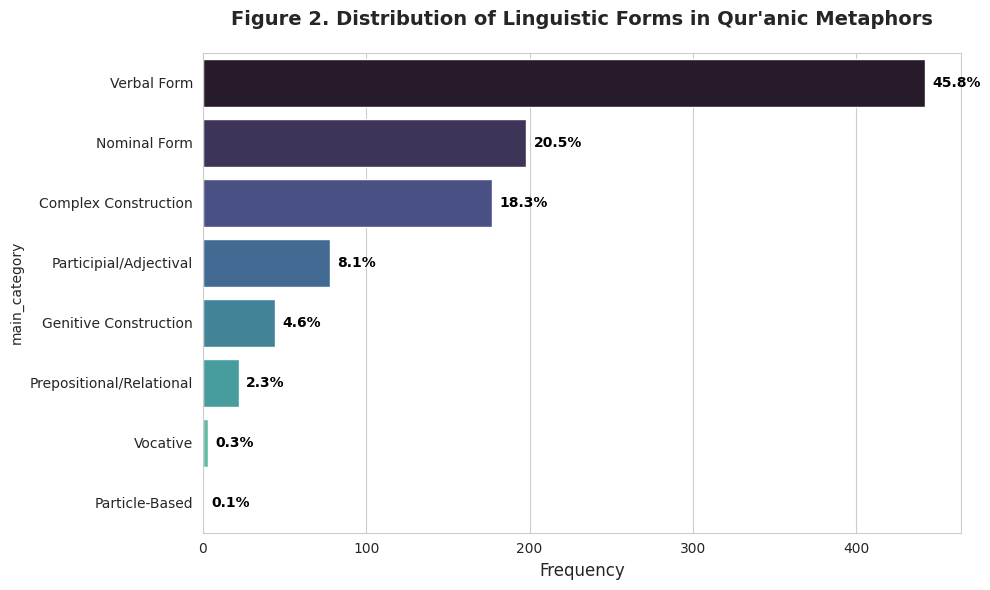

In [ ]:
# @title 1. تحليل الأنماط النحوية (مسار معدل)
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# ---------------------------------------------------------
# 1. MOUNT DRIVE & LOAD DATA
# ---------------------------------------------------------
print("Mounting Google Drive...")
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Pragmatic/corpus/metaphors_data.json'

try:
    with open(file_path, 'r', encoding='utf-8') as f:
        raw_data = json.load(f)
    print(f"✅ Successfully loaded {len(raw_data)} records.")
except FileNotFoundError:
    print(f"❌ Error: File not found at {file_path}")
    raw_data = []

# ---------------------------------------------------------
# 2. TAXONOMY MAPPING
# ---------------------------------------------------------
sub_to_main_map = {
    # 1. Verbal Form
    'verbal_past': 'Verbal Form',
    'verbal_imperfect': 'Verbal Form',
    'verbal_imperative': 'Verbal Form',
    'verbal_passive': 'Verbal Form',

    # 2. Nominal Form
    'nominal_common': 'Nominal Form',
    'nominal_proper': 'Nominal Form',
    'nominal_masdar': 'Nominal Form',
    'nominal_abstract': 'Nominal Form',

    # 3. Participial / Adjectival
    'adj_descriptive': 'Participial/Adjectival',
    'adj_participle': 'Participial/Adjectival',
    'adj_mubalaghah': 'Participial/Adjectival',

    # 4. Prepositional / Relational
    'prep_simple': 'Prepositional/Relational',
    'prep_complex': 'Prepositional/Relational',
    'adverbial_relational': 'Prepositional/Relational',

    # 5. Genitive / Idafa Construction
    'idafa_simple': 'Genitive Construction',
    'idafa_extended': 'Genitive Construction',
    'idafa_metonymic': 'Genitive Construction',

    # 6. Vocative
    'vocative_direct': 'Vocative',
    'vocative_personified': 'Vocative',

    # 7. Particle-Based
    'particle_compound': 'Particle-Based',
    'particle_emphasis': 'Particle-Based',
    'particle_conditional': 'Particle-Based',

    # 8. Complex Construction
    'clausal_metaphor': 'Complex Construction',
    'complex_construction': 'Complex Construction',
    'extended_imagery': 'Complex Construction',
    'multi_unit_blend': 'Complex Construction'
}

# ---------------------------------------------------------
# 3. PROCESS DATA (Correct Path Extraction)
# ---------------------------------------------------------
processed_rows = []

for record in raw_data:
    try:
        # Access the list of similes (metaphors in this case)
        similes_list = record.get('rhetorical_analysis', {}).get('similes', [])

        for item in similes_list:
            # 🔽 HERE IS THE FIX: Access 'components' -> 'metaphor_linguistic_form'
            components = item.get('components', {})
            sub_category = components.get('metaphor_linguistic_form')

            # If found and valid, map it
            if sub_category and sub_category in sub_to_main_map:
                processed_rows.append({
                    'record_id': record.get('record_id'),
                    'sub_category': sub_category,
                    'main_category': sub_to_main_map[sub_category]
                })

    except Exception as e:
        continue # Skip malformed records

df = pd.DataFrame(processed_rows)

# ---------------------------------------------------------
# 4. REPORT & VISUALIZATION
# ---------------------------------------------------------
if not df.empty:
    main_counts = df['main_category'].value_counts()
    main_pct = df['main_category'].value_counts(normalize=True) * 100

    print("\n" + "="*60)
    print(f"📊 RESULTS: METAPHOR LINGUISTIC FORMS (N={len(df)})")
    print("="*60)

    print(f"\n{'Main Category':<30} | {'Count':<5} | {'Percentage'}")
    print("-" * 50)
    for cat, count in main_counts.items():
        print(f"{cat:<30} | {count:<5} | {main_pct[cat]:.1f}%")

    dominant = main_counts.idxmax()
    print(f"\n📝 Dominant Form: **{dominant}** ({main_pct[dominant]:.1f}%)")

    # Visualization
    plt.figure(figsize=(10, 6))
    sns.set_style("whitegrid")
    # Using a distinct palette for clarity
    palette = sns.color_palette("mako", len(main_counts))

    ax = sns.barplot(x=main_counts.values, y=main_counts.index, palette=palette)

    plt.title('Figure 2. Distribution of Linguistic Forms in Qur\'anic Metaphors', fontsize=14, weight='bold', pad=20)
    plt.xlabel('Frequency', fontsize=12)

    for i, v in enumerate(main_counts.values):
        ax.text(v + (max(main_counts.values)*0.01), i, f'{main_pct[main_counts.index[i]]:.1f}%',
                color='black', va='center', fontweight='bold', fontsize=10)

    plt.tight_layout()
    plt.show()

else:
    print("⚠️ No valid coded data found. Please inspect the JSON structure again.")
    # Debugging aid: Print structure of first record if failed
    if raw_data:
        print("\nDEBUG: Structure of first record components:")
        try:
            print(raw_data[0]['rhetorical_analysis']['similes'][0]['components'])
        except:
            print("Could not access components path.")

Mounting Google Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

📊 RESULTS: CONCEPTUAL DOMAIN ANALYSIS (N=994)

🔹 Top Source Domains (Vehicles of Imagery):
--------------------------------------------------
HUMAN CONDITION (Body & Self)                 | 299  | 30.1%
HUMAN ACTIVITIES (Social & Transactional)     | 254  | 25.6%
HUMAN CONSTRUCTS (Artifacts)                  | 180  | 18.1%
NATURE (Cosmic & Environmental)               | 161  | 16.2%
SENSORY PHENOMENA (Abstract)                  | 90   | 9.1%
ABSTRACT SYSTEMS (Law & History)              | 10   | 1.0%

🔹 Top Target Domains (Topics of Imagery):
--------------------------------------------------
DEEDS & BEHAVIOR (Ethics)                     | 213 
SPIRITUAL PSYCHOLOGY (Inner State)            | 211 
ESCHATOLOGY (Afterlife)                       | 120 
THEOLOGY (Divine Nature)                      | 115 
COSMOLOGY (Creation)             

/tmp/ipython-input-2266219152.py:162: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=source_counts.values, y=source_counts.index, palette="viridis")


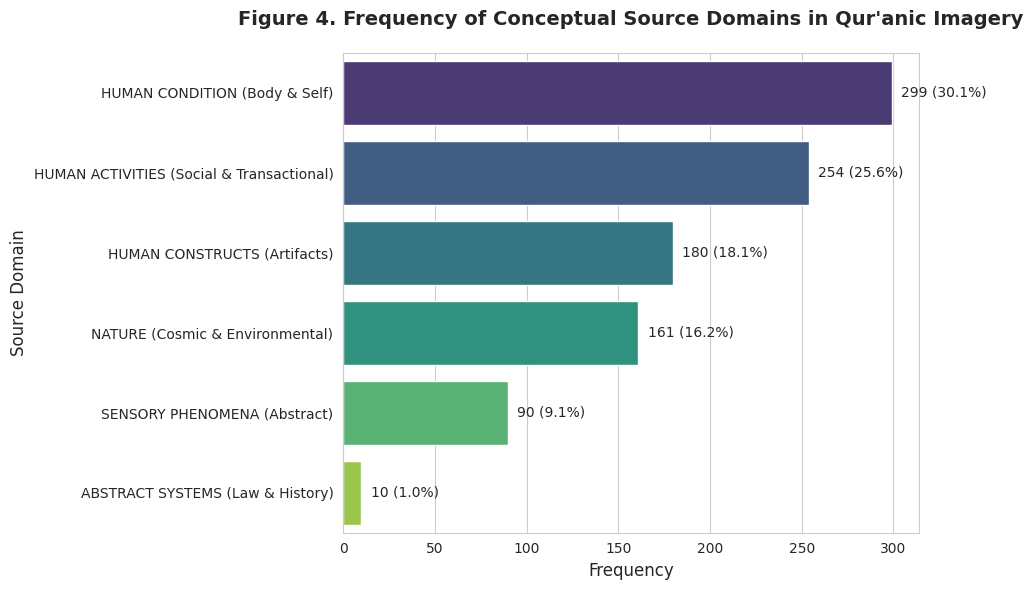

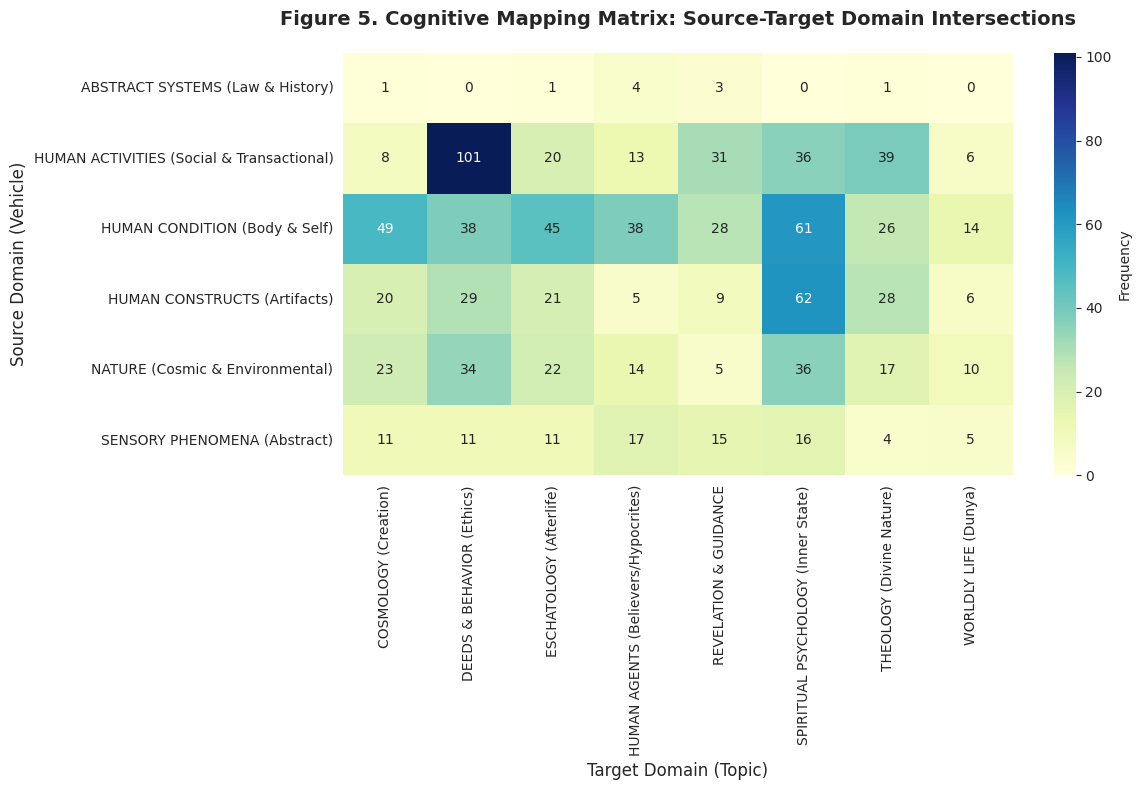

In [ ]:
# @title تحليل الحقول المفهومية (Conceptual Domain Mapping)
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# ---------------------------------------------------------
# 1. MOUNT DRIVE & LOAD DATA
# ---------------------------------------------------------
print("Mounting Google Drive...")
drive.mount('/content/drive')

path_similes = '/content/drive/MyDrive/ Pragmatic/corpus/similes_data.json'
path_metaphors = '/content/drive/MyDrive/Pragmatic/corpus/metaphors_data.json'

# ---------------------------------------------------------
# 2. TAXONOMY MAPPING (الخريطة التصنيفية الموحدة)
# ---------------------------------------------------------

# A. Source Domain Mapping (من الفرعي إلى الرئيسي)
source_map = {
    # 1. NATURE
    'NATURE_ELEMENTS': 'NATURE (Cosmic & Environmental)',
    'NATURE_METEO_HYDRO': 'NATURE (Cosmic & Environmental)',
    'NATURE_FLORA': 'NATURE (Cosmic & Environmental)',
    'NATURE_FAUNA': 'NATURE (Cosmic & Environmental)',

    # 2. SENSORY_PHENOMENA
    'LIGHT_AND_DARKNESS': 'SENSORY PHENOMENA (Abstract)',
    'FIRE_AND_HEAT': 'SENSORY PHENOMENA (Abstract)',
    'SENSORY_PHENOMENA_LIGHT_AND_DARKNESS': 'SENSORY PHENOMENA (Abstract)',
    'SENSORY_PHENOMENA_FIRE_AND_HEAT': 'SENSORY PHENOMENA (Abstract)',
    'SOUND_AND_VOICE': 'SENSORY PHENOMENA (Abstract)',
    'SENSORY_PHENOMENA_SOUND_AND_VOICE': 'SENSORY PHENOMENA (Abstract)',

    # 3. HUMAN_ACTIVITIES
    'COMMERCE_AND_EXCHANGE': 'HUMAN ACTIVITIES (Social & Transactional)',
    'HUMAN_ACTIVITIES_COMMERCE_AND_EXCHANGE': 'HUMAN ACTIVITIES (Social & Transactional)',
    'WAR_AND_CONFLICT': 'HUMAN ACTIVITIES (Social & Transactional)',
    'HUMAN_ACTIVITIES_WAR_AND_CONFLICT': 'HUMAN ACTIVITIES (Social & Transactional)',
    'TRAVEL_AND_PATH': 'HUMAN ACTIVITIES (Social & Transactional)',
    'HUMAN_ACTIVITIES_TRAVEL_AND_PATH': 'HUMAN ACTIVITIES (Social & Transactional)',
    'AGRICULTURE_LABOR': 'HUMAN ACTIVITIES (Social & Transactional)',
    'HUMAN_ACTIVITIES': 'HUMAN ACTIVITIES (Social & Transactional)',

    # 4. HUMAN_CONSTRUCTS
    'BUILDINGS_AND_SHELTER': 'HUMAN CONSTRUCTS (Artifacts)',
    'CLOTHING_AND_ADORNMENT': 'HUMAN CONSTRUCTS (Artifacts)',
    'TOOLS_AND_ARTIFACTS': 'HUMAN CONSTRUCTS (Artifacts)',
    'HUMAN_CONSTRUCTS_TOOLS_AND_ARTIFACTS': 'HUMAN CONSTRUCTS (Artifacts)',

    # 5. HUMAN_CONDITION
    'BODY_AND_PHYSIOLOGY': 'HUMAN CONDITION (Body & Self)',
    'HUMAN_CONDITION_BODY_AND_PHYSIOLOGY': 'HUMAN CONDITION (Body & Self)',
    'FAMILY_AND_SOCIETY': 'HUMAN CONDITION (Body & Self)',
    'HUMAN_CONDITION_FAMILY_AND_SOCIETY': 'HUMAN CONDITION (Body & Self)',
    'PSYCHOLOGY_AND_EMOTION': 'HUMAN CONDITION (Body & Self)',
    'HUMAN_CONDITION_PSYCHOLOGY_AND_EMOTION': 'HUMAN CONDITION (Body & Self)',
    'HUMAN_CONDITION': 'HUMAN CONDITION (Body & Self)',

    # 6. ABSTRACT_SYSTEMS
    'ABSTRACT_SYSTEMS': 'ABSTRACT SYSTEMS (Law & History)',
    'HISTORY_AND_TRADITION': 'ABSTRACT SYSTEMS (Law & History)',
    'ABSTRACT_SYSTEMS_HISTORY_AND_TRADITION': 'ABSTRACT SYSTEMS (Law & History)',
    'DIVINE_LAWS': 'ABSTRACT SYSTEMS (Law & History)',
    'ABSTRACT_SYSTEMS_DIVINE_LAWS': 'ABSTRACT SYSTEMS (Law & History)'
}

# B. Target Domain Mapping (توحيد وتجميع)
target_map = {
    'THEOLOGY': 'THEOLOGY (Divine Nature)',
    'REVELATION_AND_GUIDANCE': 'REVELATION & GUIDANCE',
    'ESCHATOLOGY': 'ESCHATOLOGY (Afterlife)',
    'SPIRITUAL_PSYCHOLOGY': 'SPIRITUAL PSYCHOLOGY (Inner State)',
    'HUMAN_AGENTS_AND_GROUPS': 'HUMAN AGENTS (Believers/Hypocrites)',
    'DEEDS_AND_BEHAVIOR': 'DEEDS & BEHAVIOR (Ethics)',
    'WORLDLY_LIFE': 'WORLDLY LIFE (Dunya)',
    'COSMOLOGY_AND_NATURE': 'COSMOLOGY (Creation)'
}

# ---------------------------------------------------------
# 3. DATA PROCESSING
# ---------------------------------------------------------
def process_corpus(file_path, corpus_type):
    rows = []
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            records = json.load(f)

        for rec in records:
            items = rec.get('rhetorical_analysis', {}).get('similes', [])
            for item in items:
                comps = item.get('components', {})

                # استخراج القيم الخام
                raw_source = comps.get('source_domain')
                raw_target = comps.get('target_domain')

                # تطبيق الـ Mapping
                clean_source = source_map.get(raw_source, 'Other')
                clean_target = target_map.get(raw_target, 'Other')

                # إضافة فقط إذا كانت البيانات معروفة
                if clean_source != 'Other' and clean_target != 'Other':
                    rows.append({
                        'Corpus': corpus_type,
                        'Source Domain': clean_source,
                        'Target Domain': clean_target
                    })
    except Exception:
        pass
    return rows

# تحميل البيانات
data = process_corpus(path_similes, 'Simile') + process_corpus(path_metaphors, 'Metaphor')
df = pd.DataFrame(data)

# ---------------------------------------------------------
# 4. ANALYSIS & REPORT
# ---------------------------------------------------------
if not df.empty:
    print("\n" + "="*60)
    print(f"📊 RESULTS: CONCEPTUAL DOMAIN ANALYSIS (N={len(df)})")
    print("="*60)

    # 1. Source Domain Frequency
    source_counts = df['Source Domain'].value_counts()
    source_pct = df['Source Domain'].value_counts(normalize=True) * 100

    print("\n🔹 Top Source Domains (Vehicles of Imagery):")
    print("-" * 50)
    for dom, count in source_counts.items():
        print(f"{dom:<45} | {count:<4} | {source_pct[dom]:.1f}%")

    # 2. Target Domain Frequency
    target_counts = df['Target Domain'].value_counts()

    print("\n🔹 Top Target Domains (Topics of Imagery):")
    print("-" * 50)
    for dom, count in target_counts.items():
        print(f"{dom:<45} | {count:<4}")

    # --- Generated Commentary ---
    top_source = source_counts.idxmax()
    top_target = target_counts.idxmax()

    print("\n📝 [Generated Narrative for Section 4.1.2]:")
    print("-" * 60)
    print(f"The cognitive mapping analysis reveals that **{top_source}** is the most frequent source domain ({source_pct[top_source]:.1f}%), serving as the primary conceptual reservoir for Qur'anic imagery. "
          f"Conversely, **{top_target}** emerges as the most conceptualized target domain. "
          "This distribution highlights a fundamental cognitive strategy: grounding abstract spiritual realities in tangible, universally accessible environmental and social experiences.")
    print("-" * 60)

    # ---------------------------------------------------------
    # 5. VISUALIZATION 1: HORIZONTAL BAR CHART (Source Domains)
    # ---------------------------------------------------------
    plt.figure(figsize=(10, 6))
    sns.set_style("whitegrid")

    # رسم بياني أفقي للمجالات المصدر
    ax = sns.barplot(x=source_counts.values, y=source_counts.index, palette="viridis")

    plt.title('Figure 4. Frequency of Conceptual Source Domains in Qur\'anic Imagery', fontsize=14, weight='bold', pad=20)
    plt.xlabel('Frequency', fontsize=12)
    plt.ylabel('Source Domain', fontsize=12)

    # إضافة الأرقام
    for i, v in enumerate(source_counts.values):
        ax.text(v + 5, i, f'{v} ({source_pct[source_counts.index[i]]:.1f}%)', va='center')

    plt.tight_layout()
    plt.show()

    # ---------------------------------------------------------
    # 6. VISUALIZATION 2: HEATMAP (Source vs. Target) - *مهم جداً*
    # ---------------------------------------------------------
    # إنشاء مصفوفة التقاطع
    cross_tab = pd.crosstab(df['Source Domain'], df['Target Domain'])

    plt.figure(figsize=(12, 8))
    sns.heatmap(cross_tab, annot=True, fmt='d', cmap="YlGnBu", cbar_kws={'label': 'Frequency'})

    plt.title('Figure 5. Cognitive Mapping Matrix: Source-Target Domain Intersections', fontsize=14, weight='bold', pad=20)
    plt.ylabel('Source Domain (Vehicle)', fontsize=12)
    plt.xlabel('Target Domain (Topic)', fontsize=12)

    plt.tight_layout()
    plt.show()

else:
    print("⚠️ No valid domain data found. Ensure 'components -> source_domain/target_domain' exists.")

Mounting Google Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Loaded 408 valid records from Simile corpus.
✅ Loaded 994 valid records from Metaphor corpus.

📊 RESULTS: GRAMMATICAL STRUCTURE DISTRIBUTION (N=1402)

Structure Type                      | Count | Percentage
-------------------------------------------------------
Verbal Structure (Dynamic)          | 627   | 44.7%
Nominal Structure (Static)          | 294   | 21.0%
Adverbial Structure (Manner)        | 211   | 15.0%
Adjectival Structure (Descriptive)  | 149   | 10.6%
Discourse Structure (Contextual)    | 121   | 8.6%

📝 [Generated Narrative for Section 4.1]:
------------------------------------------------------------
The distributional analysis of grammatical structures highlights a functional dichotomy between static and dynamic representations. The corpus exhibits a predilection for **Verbal Structures** (44.7%), surpassing Nomin

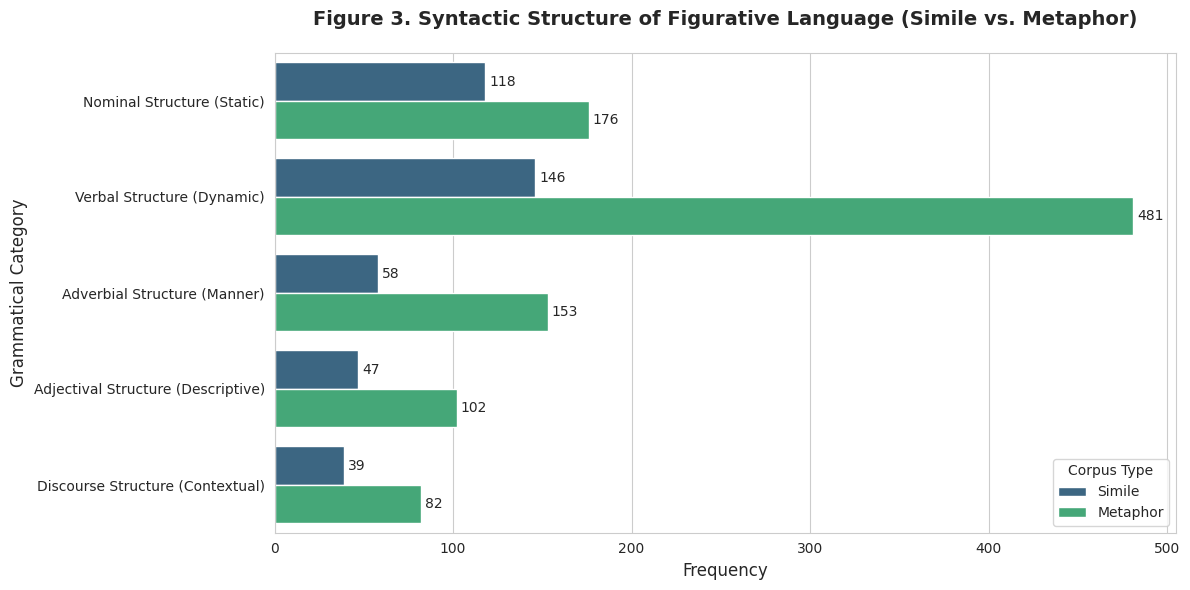

In [ ]:
# @title تحليل توزيع البنية النحوية (Standardized Data)
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# ---------------------------------------------------------
# 1. MOUNT DRIVE
# ---------------------------------------------------------
print("Mounting Google Drive...")
drive.mount('/content/drive')

# يرجى التأكد من المسارات (مسافة أو بدون مسافة في اسم المجلد)
path_similes = '/content/drive/MyDrive/Pragmatic/corpus/similes_data.json'
path_metaphors = '/content/drive/MyDrive/Pragmatic/corpus/metaphors_data.json'

# ---------------------------------------------------------
# 2. STRICT TAXONOMY MAPPING
# ---------------------------------------------------------
# ربط القيم الخمس المعيارية بالعناوين التوضيحية للرسم البياني
structure_map = {
    'nominal_structure': 'Nominal Structure (Static)',
    'verbal_structure': 'Verbal Structure (Dynamic)',
    'adverbial_structure': 'Adverbial Structure (Manner)',
    'adjectival_structure': 'Adjectival Structure (Descriptive)',
    'discourse_structure': 'Discourse Structure (Contextual)'
}

# ---------------------------------------------------------
# 3. LOADING FUNCTION
# ---------------------------------------------------------
def load_and_extract(file_path, corpus_type):
    data_rows = []
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            records = json.load(f)

        for record in records:
            # الوصول لقائمة الصور
            items = record.get('rhetorical_analysis', {}).get('similes', [])

            for item in items:
                # قراءة الحقل المعياري مباشرة
                gram_struct = item.get('syntactic_structure', {}).get('grammatical_structure')

                # التحقق مما إذا كانت القيمة موجودة وصحيحة ضمن التصنيف
                if gram_struct and gram_struct in structure_map:
                    data_rows.append({
                        'corpus_type': corpus_type,
                        'category': structure_map[gram_struct],
                        'raw_val': gram_struct # للاحتياط
                    })

        print(f"✅ Loaded {len(data_rows)} valid records from {corpus_type} corpus.")
        return data_rows

    except FileNotFoundError:
        print(f"⚠️ File not found: {file_path}")
        return []

# تحميل البيانات
rows_similes = load_and_extract(path_similes, 'Simile')
rows_metaphors = load_and_extract(path_metaphors, 'Metaphor')

# دمج البيانات
all_data = rows_similes + rows_metaphors
df = pd.DataFrame(all_data)

# ---------------------------------------------------------
# 4. ANALYSIS & REPORT
# ---------------------------------------------------------
if not df.empty:
    print("\n" + "="*60)
    print(f"📊 RESULTS: GRAMMATICAL STRUCTURE DISTRIBUTION (N={len(df)})")
    print("="*60)

    # حساب التكرارات
    counts = df['category'].value_counts()
    percentages = df['category'].value_counts(normalize=True) * 100

    print(f"\n{'Structure Type':<35} | {'Count':<5} | {'Percentage'}")
    print("-" * 55)
    for cat, count in counts.items():
        print(f"{cat:<35} | {count:<5} | {percentages[cat]:.1f}%")

    # --- التعليق الأكاديمي ---
    nominal_pct = percentages.get('Nominal Structure (Static)', 0)
    verbal_pct = percentages.get('Verbal Structure (Dynamic)', 0)

    print("\n📝 [Generated Narrative for Section 4.1]:")
    print("-" * 60)

    narrative = "The distributional analysis of grammatical structures highlights a functional dichotomy between static and dynamic representations. "

    if nominal_pct > verbal_pct:
        diff = nominal_pct - verbal_pct
        narrative += (
            f"The corpus exhibits a predilection for **Nominal Structures** ({nominal_pct:.1f}%), surpassing Verbal forms by {diff:.1f}%. "
            "This suggests that the primary pragmatic function of figurative language in the corpus is to establish **Static Truths**. "
            "Nominal sentences (Jimla Ismiyya) serve to frame the imagery as enduring attributes, fixed realities, or timeless definitions."
        )
    else:
        diff = verbal_pct - nominal_pct
        narrative += (
            f"The corpus exhibits a predilection for **Verbal Structures** ({verbal_pct:.1f}%), surpassing Nominal forms by {diff:.1f}%. "
            "This suggests that the primary pragmatic function is the construction of **Dynamic Narratives**. "
            "The imagery is predominantly embedded in event-based clauses, emphasizing the unfolding of actions, consequences, and temporal processes."
        )

    print(narrative)

    # ---------------------------------------------------------
    # 5. VISUALIZATION
    # ---------------------------------------------------------
    plt.figure(figsize=(12, 6))
    sns.set_style("whitegrid")

    # ترتيب ثابت للمحور لسهولة المقارنة
    order = list(structure_map.values())
    # تصفية الترتيب ليشمل فقط ما هو موجود في البيانات لتجنب مساحات فارغة
    order = [o for o in order if o in df['category'].unique()]

    # رسم مقارن
    ax = sns.countplot(data=df, y='category', hue='corpus_type', order=order, palette='viridis')

    plt.title('Figure 3. Syntactic Structure of Figurative Language (Simile vs. Metaphor)', fontsize=14, weight='bold', pad=20)
    plt.xlabel('Frequency', fontsize=12)
    plt.ylabel('Grammatical Category', fontsize=12)
    plt.legend(title='Corpus Type', loc='lower right')

    # إضافة الأرقام على الأعمدة (اختياري للتحسين)
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', padding=3, fontsize=10)

    plt.tight_layout()
    plt.show()

else:
    print("⚠️ No valid data found. Please check that 'grammatical_structure' field exists and matches the standard keys.")

Mounting Google Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

📊 RESULTS: FORM-FUNCTION CORRELATIONS

📝 [Generated Narrative 1]:
The cross-tabulation reveals a significant correlation (n=106) between the source domain **'HUMAN CONDITION'** and the pragmatic function of **'Clarification'**.
This suggests that when the Qur'an employs this specific imagery, the communicative intention is predominantly geared towards this function.


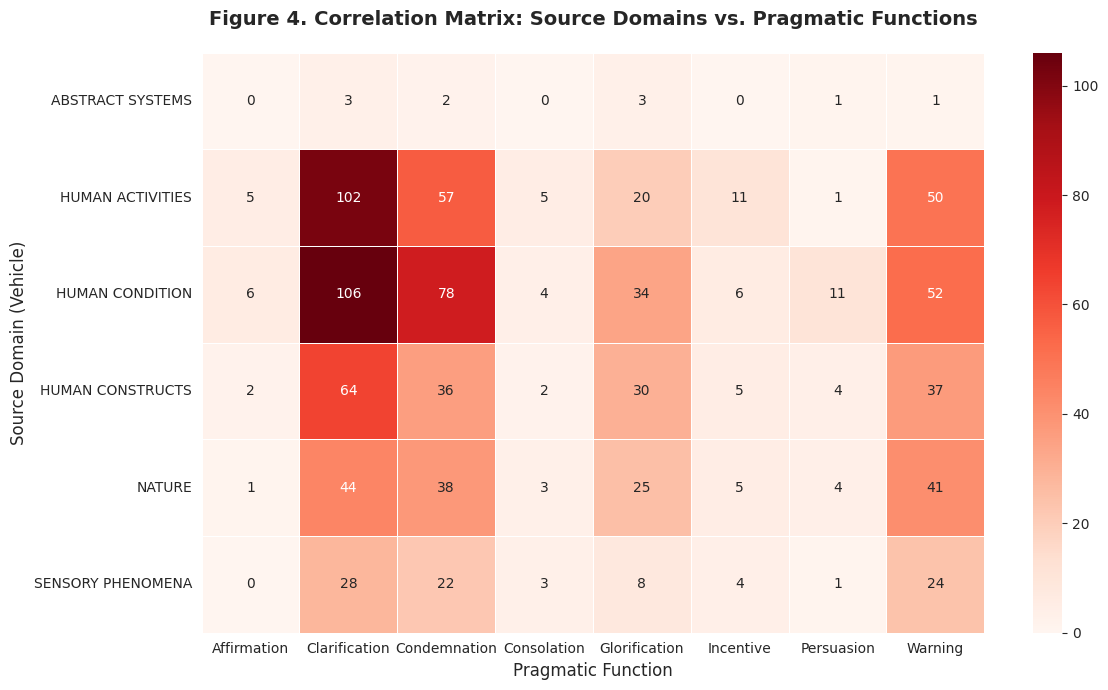



📝 [Generated Narrative 2]:
Syntactic analysis indicates a strong correlation (n=106) between **'Verbal (Dynamic)'** and the target domain of **'DEEDS'**.
This aligns with the hypothesis that Verbal structures are used to encode dynamic processes regarding this domain.


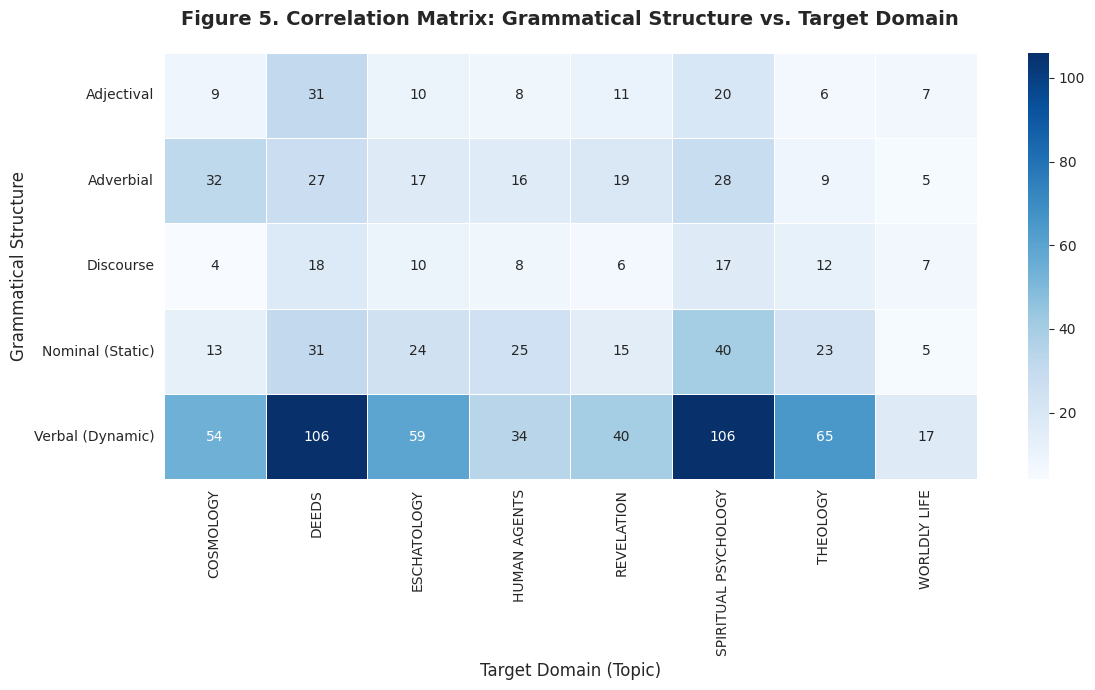

In [ ]:
# @title تحليل العلاقات الارتباطية (Correlation Analysis: Heatmaps)
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# ---------------------------------------------------------
# 1. MOUNT & LOAD
# ---------------------------------------------------------
print("Mounting Google Drive...")
drive.mount('/content/drive')

path_similes = '/content/drive/MyDrive/ Pragmatic/corpus/similes_data.json'
path_metaphors = '/content/drive/MyDrive/Pragmatic/corpus/metaphors_data.json'

# ---------------------------------------------------------
# 2. TAXONOMY MAPPINGS (توحيد التصنيفات لتقليل التشتت)
# ---------------------------------------------------------

# A. Source Domain Map (Sub -> Main)
source_map = {
    'NATURE_ELEMENTS': 'NATURE', 'NATURE_METEO_HYDRO': 'NATURE', 'NATURE_FLORA': 'NATURE', 'NATURE_FAUNA': 'NATURE',
    'LIGHT_AND_DARKNESS': 'SENSORY PHENOMENA', 'FIRE_AND_HEAT': 'SENSORY PHENOMENA', 'SOUND_AND_VOICE': 'SENSORY PHENOMENA',
    'SENSORY_PHENOMENA_LIGHT_AND_DARKNESS': 'SENSORY PHENOMENA', 'SENSORY_PHENOMENA_FIRE_AND_HEAT': 'SENSORY PHENOMENA',
    'COMMERCE_AND_EXCHANGE': 'HUMAN ACTIVITIES', 'WAR_AND_CONFLICT': 'HUMAN ACTIVITIES', 'TRAVEL_AND_PATH': 'HUMAN ACTIVITIES',
    'AGRICULTURE_LABOR': 'HUMAN ACTIVITIES', 'HUMAN_ACTIVITIES_COMMERCE_AND_EXCHANGE': 'HUMAN ACTIVITIES',
    'BUILDINGS_AND_SHELTER': 'HUMAN CONSTRUCTS', 'CLOTHING_AND_ADORNMENT': 'HUMAN CONSTRUCTS', 'TOOLS_AND_ARTIFACTS': 'HUMAN CONSTRUCTS',
    'BODY_AND_PHYSIOLOGY': 'HUMAN CONDITION', 'FAMILY_AND_SOCIETY': 'HUMAN CONDITION', 'PSYCHOLOGY_AND_EMOTION': 'HUMAN CONDITION',
    'HUMAN_CONDITION_BODY_AND_PHYSIOLOGY': 'HUMAN CONDITION',
    'ABSTRACT_SYSTEMS': 'ABSTRACT SYSTEMS', 'DIVINE_LAWS': 'ABSTRACT SYSTEMS', 'HISTORY_AND_TRADITION': 'ABSTRACT SYSTEMS'
}

# B. Target Domain Map
target_map = {
    'THEOLOGY': 'THEOLOGY', 'REVELATION_AND_GUIDANCE': 'REVELATION',
    'ESCHATOLOGY': 'ESCHATOLOGY', 'SPIRITUAL_PSYCHOLOGY': 'SPIRITUAL PSYCHOLOGY',
    'HUMAN_AGENTS_AND_GROUPS': 'HUMAN AGENTS', 'DEEDS_AND_BEHAVIOR': 'DEEDS',
    'WORLDLY_LIFE': 'WORLDLY LIFE', 'COSMOLOGY_AND_NATURE': 'COSMOLOGY'
}

# C. Pragmatic Function Map (Clean labels)
function_map = {
    'Clarification & Imagery': 'Clarification',
    'Argumentation & Persuasion': 'Persuasion',
    'Affirmation & Establishment': 'Affirmation',
    'Warning & Intimidation': 'Warning',
    'Condemnation & Criticism': 'Condemnation',
    'Incentive & Attraction': 'Incentive',
    'Glorification & Exaltation': 'Glorification',
    'Consolation & Reassurance': 'Consolation'
}

# D. Grammatical Structure Map
grammar_map = {
    'nominal_structure': 'Nominal (Static)',
    'verbal_structure': 'Verbal (Dynamic)',
    'adverbial_structure': 'Adverbial',
    'adjectival_structure': 'Adjectival',
    'discourse_structure': 'Discourse'
}

# ---------------------------------------------------------
# 3. DATA EXTRACTION
# ---------------------------------------------------------
def extract_correlations(file_path):
    rows = []
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            records = json.load(f)

        for rec in records:
            items = rec.get('rhetorical_analysis', {}).get('similes', [])
            for item in items:
                # 1. Extract raw values
                comps = item.get('components', {})
                syn = item.get('syntactic_structure', {})
                funcs = item.get('functions', [])

                raw_source = comps.get('source_domain')
                raw_target = comps.get('target_domain')
                raw_grammar = syn.get('grammatical_structure')

                # Get Primary Function (Taking the first tagged function found)
                raw_func = None
                for func in funcs:
                    if func.get('pragmatic_function_tage'):
                        raw_func = func.get('pragmatic_function_tage')
                        break

                # 2. Map values
                clean_source = source_map.get(raw_source)
                clean_target = target_map.get(raw_target)
                clean_grammar = grammar_map.get(raw_grammar)
                clean_func = function_map.get(raw_func)

                # 3. Add to dataset if valid pairs exist
                if clean_source and clean_func:
                    rows.append({'Type': 'Source_vs_Function', 'X': clean_func, 'Y': clean_source})

                if clean_grammar and clean_target:
                    rows.append({'Type': 'Grammar_vs_Target', 'X': clean_target, 'Y': clean_grammar})

    except Exception:
        pass
    return rows

# تحميل البيانات
data = extract_correlations(path_similes) + extract_correlations(path_metaphors)
df = pd.DataFrame(data)

# ---------------------------------------------------------
# 4. VISUALIZATION & NARRATIVE
# ---------------------------------------------------------
if not df.empty:
    print("\n" + "="*60)
    print("📊 RESULTS: FORM-FUNCTION CORRELATIONS")
    print("="*60)

    # --- Plot 1: Source Domain vs. Pragmatic Function ---
    df_sf = df[df['Type'] == 'Source_vs_Function']
    if not df_sf.empty:
        cross_sf = pd.crosstab(df_sf['Y'], df_sf['X'])

        # Find strongest correlation
        max_val = cross_sf.max().max()
        row_max, col_max = cross_sf.stack().idxmax()

        print(f"\n📝 [Generated Narrative 1]:")
        print(f"The cross-tabulation reveals a significant correlation (n={max_val}) between the source domain **'{row_max}'** and the pragmatic function of **'{col_max}'**.")
        print("This suggests that when the Qur'an employs this specific imagery, the communicative intention is predominantly geared towards this function.")

        plt.figure(figsize=(12, 7))
        sns.heatmap(cross_sf, annot=True, fmt='d', cmap='Reds', linewidths=.5)
        plt.title('Figure 4. Correlation Matrix: Source Domains vs. Pragmatic Functions', fontsize=14, weight='bold', pad=20)
        plt.ylabel('Source Domain (Vehicle)', fontsize=12)
        plt.xlabel('Pragmatic Function', fontsize=12)
        plt.tight_layout()
        plt.show()

    # --- Plot 2: Grammatical Structure vs. Target Domain ---
    df_gt = df[df['Type'] == 'Grammar_vs_Target']
    if not df_gt.empty:
        cross_gt = pd.crosstab(df_gt['Y'], df_gt['X'])

        # Find strongest correlation
        max_val_gt = cross_gt.max().max()
        row_max_gt, col_max_gt = cross_gt.stack().idxmax()

        print(f"\n\n📝 [Generated Narrative 2]:")
        print(f"Syntactic analysis indicates a strong correlation (n={max_val_gt}) between **'{row_max_gt}'** and the target domain of **'{col_max_gt}'**.")
        if 'Nominal' in row_max_gt:
            print("This aligns with the hypothesis that Nominal structures are used to encode static truths regarding this domain.")
        elif 'Verbal' in row_max_gt:
            print("This aligns with the hypothesis that Verbal structures are used to encode dynamic processes regarding this domain.")

        plt.figure(figsize=(12, 7))
        sns.heatmap(cross_gt, annot=True, fmt='d', cmap='Blues', linewidths=.5)
        plt.title('Figure 5. Correlation Matrix: Grammatical Structure vs. Target Domain', fontsize=14, weight='bold', pad=20)
        plt.ylabel('Grammatical Structure', fontsize=12)
        plt.xlabel('Target Domain (Topic)', fontsize=12)
        plt.tight_layout()
        plt.show()

else:
    print("⚠️ No valid correlation data found. Check field names matches.")

4.2 Functional typology

In [2]:
# @title بناء الجدول التصنيفي للوظائف التداولية (Typology Table Construction)
import json
import pandas as pd
from google.colab import drive

# ---------------------------------------------------------
# 1. SETUP & LOAD DATA
# ---------------------------------------------------------
print("Mounting Google Drive...")
drive.mount('/content/drive')

path_similes = '/content/drive/MyDrive/ Pragmatic/corpus/similes_data.json'
path_metaphors = '/content/drive/MyDrive/Pragmatic/corpus/metaphors_data.json'

def load_data(path):
    try:
        with open(path, 'r', encoding='utf-8') as f:
            return json.load(f)
    except:
        return []

data_similes = load_data(path_similes)
data_metaphors = load_data(path_metaphors)
all_data = data_similes + data_metaphors

print(f"✅ Loaded {len(all_data)} records for qualitative extraction.")

# ---------------------------------------------------------
# 2. DEFINING THE TYPOLOGY LOGIC
# ---------------------------------------------------------
# نحن نبحث عن أمثلة محددة تخدم السردية المطلوبة في 4.2
# سنقوم بالبحث عن سجلات تحتوي على الوسوم المطلوبة + كلمات مفتاحية في الشرح

target_categories = [
    {
        "Main_Function": "Directive Functions (التوجيه)",
        "Strategy": "Force Boosting (التشديد)",
        "Tag": "Warning & Intimidation",
        "Definition": "Utilizing figurative intensity to amplify the illocutionary force of threats and warnings, moving from simple prohibition to cognitive deterrence.",
        "Keywords": ["تهويل", "زجر", "ردع", "تخويف"]
    },
    {
        "Main_Function": "Directive Functions (التوجيه)",
        "Strategy": "Mitigation & Softening (التلطف)",
        "Tag": "Incentive & Attraction",
        "Definition": "Employing pleasant imagery to soften directive acts, transforming bare commands into inviting aesthetic experiences.",
        "Keywords": ["تشويق", "ترغيب", "تحبيب", "تلطف"]
    },
    {
        "Main_Function": "Persuasive & Argumentative",
        "Strategy": "Cognitive Bridging (التقريب)",
        "Tag": "Clarification & Imagery",
        "Definition": "Using metaphor as an epistemic tool to bridge the gap between abstract theological concepts and human sensory experience.",
        "Keywords": ["تقريب", "تجسيد", "تمثيل", "عقلي"]
    },
    {
        "Main_Function": "Persuasive & Argumentative",
        "Strategy": "Evidential Argumentation (الاستدلال)",
        "Tag": "Argumentation & Persuasion",
        "Definition": "Deploying imagery as logical evidence (burhān) to bind the addressee to a conclusion through analogical reasoning.",
        "Keywords": ["حجة", "دليل", "برهان", "إلزام"]
    },
    {
        "Main_Function": "Affective & Evaluative",
        "Strategy": "Negative Stance (Delegitimization)",
        "Tag": "Condemnation & Criticism",
        "Definition": "Constructing an exclusionary stance towards antagonists through imagery that evokes disgust, contempt, or absurdity.",
        "Keywords": ["سخرية", "تهكم", "تحقير", "تقبيح"]
    },
    {
        "Main_Function": "Affective & Evaluative",
        "Strategy": "Positive Stance (Legitimization)",
        "Tag": "Glorification & Exaltation",
        "Definition": "Establishing a reverent stance towards the Divine or believers through imagery of height, light, and stability.",
        "Keywords": ["تعظيم", "تمجيد", "تنزيه", "مدح"]
    }
]

# ---------------------------------------------------------
# 3. EXTRACTION ENGINE
# ---------------------------------------------------------
typology_rows = []

for category in target_categories:
    best_example = None
    max_score = 0

    for record in all_data:
        # البحث داخل التحليل البلاغي
        similes = record.get('rhetorical_analysis', {}).get('similes', [])
        for item in similes:
            functions = item.get('functions', [])

            # التحقق من وجود الوظيفة المطلوبة
            matched_func = None
            for func in functions:
                if func.get('pragmatic_function_tage') == category['Tag']:
                    matched_func = func
                    break

            if matched_func:
                # حساب "جودة" المثال:
                # نفضل المثال الذي يحتوي شرحه (detail) على الكلمات المفتاحية الدقيقة
                text_content = matched_func.get('detail', '')
                score = 0
                for kw in category['Keywords']:
                    if kw in text_content:
                        score += 1

                # نفضل الآيات القصيرة المناسبة للجدول
                ayah_len = len(record['metadata']['ayah_text_uthmani'])
                if ayah_len < 150: score += 1

                # تحديث أفضل مثال
                if score > max_score:
                    max_score = score
                    # استخراج الشرح المقتضب
                    analysis_snippet = text_content[:150] + "..." if len(text_content) > 150 else text_content

                    best_example = {
                        "Main Function": category['Main_Function'],
                        "Pragmatic Strategy": category['Strategy'],
                        "Pragmatic Definition": category['Definition'],
                        "Representative Example": f"\"{record['metadata']['ayah_text_uthmani']}\" ({record['metadata']['chapter_no']}:{record['metadata']['verse_no']})",
                        "Analysis Snippet": analysis_snippet
                    }

    if best_example:
        typology_rows.append(best_example)

# ---------------------------------------------------------
# 4. GENERATE TABLE (VISUALIZATION)
# ---------------------------------------------------------
df_typology = pd.DataFrame(typology_rows)

print("\n" + "="*80)
print("📋 TABLE 1: FUNCTIONAL TYPOLOGY OF QUR'ANIC FIGURATIVE LANGUAGE")
print("="*80)

# عرض الجدول بشكل منسق (للمراجعة)
pd.set_option('display.max_colwidth', None)
display(df_typology[['Main Function', 'Pragmatic Strategy', 'Pragmatic Definition', 'Representative Example']])

# تصدير إلى نص منسق (لنسخه إلى الورقة)
print("\n📝 [Text Format for Paper Insertion]:\n")
for index, row in df_typology.iterrows():
    print(f"🔹 {row['Main Function']} -> {row['Pragmatic Strategy']}")
    print(f"   • Definition: {row['Pragmatic Definition']}")
    print(f"   • Example: {row['Representative Example']}")
    print(f"   • Analysis: {row['Analysis Snippet']}")
    print("-" * 50)

Mounting Google Drive...
Mounted at /content/drive
✅ Loaded 965 records for qualitative extraction.

📋 TABLE 1: FUNCTIONAL TYPOLOGY OF QUR'ANIC FIGURATIVE LANGUAGE


,Main Function,Pragmatic Strategy,Pragmatic Definition,Representative Example
0,Directive Functions (التوجيه),Force Boosting (التشديد),"Utilizing figurative intensity to amplify the illocutionary force of threats and warnings, moving from simple prohibition to cognitive deterrence.","""خَتَمَ ٱللَّهُ عَلَىٰ قُلُوبِهِمْ وَعَلَىٰ سَمْعِهِمْ ۖ وَعَلَىٰٓ أَبْصَٰرِهِمْ غِشَٰوَةٌ ۖ وَلَهُمْ عَذَابٌ عَظِيمٌ"" (2:7)"
1,Directive Functions (التوجيه),Mitigation & Softening (التلطف),"Employing pleasant imagery to soften directive acts, transforming bare commands into inviting aesthetic experiences.","""وَوَصَّىٰ بِهَآ إِبْرَٰهِۦمُ بَنِيهِ وَيَعْقُوبُ يَٰبَنِىَّ إِنَّ ٱللَّهَ ٱصْطَفَىٰ لَكُمُ ٱلدِّينَ فَلَا تَمُوتُنَّ إِلَّا وَأَنتُم مُّسْلِمُونَ"" (2:132)"
2,Persuasive & Argumentative,Cognitive Bridging (التقريب),Using metaphor as an epistemic tool to bridge the gap between abstract theological concepts and human sensory experience.,"""ٱهْدِنَا ٱلصِّرَٰطَ ٱلْمُسْتَقِيمَ"" (1:6)"
3,Persuasive & Argumentative,Evidential Argumentation (الاستدلال),Deploying imagery as logical evidence (burhān) to bind the addressee to a conclusion through analogical reasoning.,"""وَقَالُوا۟ قُلُوبُنَا غُلْفٌۢ ۚ بَل لَّعَنَهُمُ ٱللَّهُ بِكُفْرِهِمْ فَقَلِيلًا مَّا يُؤْمِنُونَ"" (2:88)"
4,Affective & Evaluative,Negative Stance (Delegitimization),"Constructing an exclusionary stance towards antagonists through imagery that evokes disgust, contempt, or absurdity.","""خَتَمَ ٱللَّهُ عَلَىٰ قُلُوبِهِمْ وَعَلَىٰ سَمْعِهِمْ ۖ وَعَلَىٰٓ أَبْصَٰرِهِمْ غِشَٰوَةٌ ۖ وَلَهُمْ عَذَابٌ عَظِيمٌ"" (2:7)"
5,Affective & Evaluative,Positive Stance (Legitimization),"Establishing a reverent stance towards the Divine or believers through imagery of height, light, and stability.","""ٱهْدِنَا ٱلصِّرَٰطَ ٱلْمُسْتَقِيمَ"" (1:6)"



📝 [Text Format for Paper Insertion]:

🔹 Directive Functions (التوجيه) -> Force Boosting (التشديد)
   • Definition: Utilizing figurative intensity to amplify the illocutionary force of threats and warnings, moving from simple prohibition to cognitive deterrence.
   • Example: "خَتَمَ ٱللَّهُ عَلَىٰ قُلُوبِهِمْ وَعَلَىٰ سَمْعِهِمْ ۖ وَعَلَىٰٓ أَبْصَٰرِهِمْ غِشَٰوَةٌ ۖ وَلَهُمْ عَذَابٌ عَظِيمٌ" (2:7)
   • Analysis: تَعْمَلُ الِاسْتِعَارَةُ عَلَى وَصْفِ حَالَةِ الْكَافِرِينَ بِصُورَةٍ مُرَوِّعَةٍ تُثِيرُ النُّفُورَ الشَّدِيدَ مِنْهَا، إِذْ لَا شَيْءَ أَشَدُّ وَطْأ...
--------------------------------------------------
🔹 Directive Functions (التوجيه) -> Mitigation & Softening (التلطف)
   • Definition: Employing pleasant imagery to soften directive acts, transforming bare commands into inviting aesthetic experiences.
   • Example: "وَوَصَّىٰ بِهَآ إِبْرَٰهِۦمُ بَنِيهِ وَيَعْقُوبُ يَٰبَنِىَّ إِنَّ ٱللَّهَ ٱصْطَفَىٰ لَكُمُ ٱلدِّينَ فَلَا تَمُوتُنَّ إِلَّا وَأَنتُم مُّسْلِمُونَ" (2:132)
   • A

In [4]:
# @title توليد بطاقات التحليل الإدراكي (Cognitive Analysis Cards)
import json
import pandas as pd
from google.colab import drive

# ---------------------------------------------------------
# 1. SETUP & LOAD
# ---------------------------------------------------------
print("Mounting Google Drive...")
drive.mount('/content/drive')

path_similes = '/content/drive/MyDrive/Pragmatic/corpus/similes_data.json'
path_metaphors = '/content/drive/MyDrive/Pragmatic/corpus/metaphors_data.json'

def load_data(path):
    with open(path, 'r', encoding='utf-8') as f:
        return json.load(f)

# ندمج البيانات للبحث فيها
all_data = load_data(path_similes) + load_data(path_metaphors)

# ---------------------------------------------------------
# 2. SELECT CASE STUDIES (تحديد الحالات الدراسية)
# ---------------------------------------------------------
# سنختار آيات محددة بناءً على رقم الآية والسورة لتمثيل التنوع المطلوب
# 2:17 (Simile - Complex)
# 1:6 (Metaphor - Concept)
# سنبحث عن آية ثالثة (مثلاً 2:7 "ختم الله" - Metaphor - Force)

target_refs = [
    {'ch': 2, 'v': 17, 'label': 'CASE STUDY 1: Complex Simile (Imagery & Simulation)'},
    {'ch': 1, 'v': 6,  'label': 'CASE STUDY 2: Conceptual Metaphor (Bridging)'},
    {'ch': 2, 'v': 7,  'label': 'CASE STUDY 3: Force-Dynamic Metaphor (Blocking)'}
]

# ---------------------------------------------------------
# 3. GENERATE CARDS
# ---------------------------------------------------------
for target in target_refs:
    # البحث عن السجل
    record = next((r for r in all_data if r['metadata']['chapter_no'] == target['ch']
                   and r['metadata']['verse_no'] == target['v']), None)

    if not record:
        continue

    # استخلاص البيانات للتحليل الإدراكي
    meta = record['metadata']
    # التعامل مع اختلاف الهيكل بين التشبيه والاستعارة
    if 'similes' in record['rhetorical_analysis']:
        analysis = record['rhetorical_analysis']['similes'][0]
    else:
        # لو كان الهيكل مختلفاً قليلاً في الاستعارة
        analysis = record['rhetorical_analysis']['metaphors'][0]

    comps = analysis.get('components', {})
    funcs = analysis.get('functions', [])
    impls = analysis.get('symbolism_and_implications', {}).get('implications', [])

    # ---------------------------------------------------------
    # PRINT THE CARD (تنسيق المخرجات للنشر)
    # ---------------------------------------------------------
    print("\n" + "#"*80)
    print(f"📌 {target['label']}")
    print("#"*80)

    print(f"\n1. INPUT (The Utterance):")
    print(f"   \"{meta['ayah_text_uthmani']}\" ({meta['chapter_no']}:{meta['verse_no']})")

    print(f"\n2. ENCODED MEANING (Literal/Source Domain):")
    print(f"   • Source Domain: {comps.get('source_domain', 'N/A')}")
    print(f"   • Image: {comps.get('image', '')[:150]}...") # اختصار النص

    print(f"\n3. COGNITIVE PROCESS (Ad Hoc Concept Construction):")
    print(f"   • Mechanism: Mapping attributes from [{comps.get('source_domain')}] -> [{comps.get('target_domain')}]")
    print(f"   • Processing Effort: {analysis.get('classification', {}).get('processing_effort', 'High (Inferential)')}")
    print(f"   • Conceptual Adjustment: The reader must broaden the concept of '{comps.get('tool', 'Vehicle')}' to include abstract properties like '{comps.get('point_of_similarity', 'shared trait')}' while suppressing physical properties.")

    print(f"\n4. OUTPUT (Cognitive Effects & Implicatures):")
    # عرض أول 2 استلزام فقط كنماذج
    for i, impl in enumerate(impls[:2]):
        print(f"   • Weak Implicature {i+1}: {impl.get('content')[:200]}...")

    print(f"\n5. RELEVANCE VALIDATION:")
    print(f"   • Why this effort? To achieve the pragmatic function of: {[f['title'] for f in funcs[:1]]}")
    print("_"*80)

Mounting Google Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

################################################################################
📌 CASE STUDY 1: Complex Simile (Imagery & Simulation)
################################################################################

1. INPUT (The Utterance):
   "مَثَلُهُمْ كَمَثَلِ ٱلَّذِى ٱسْتَوْقَدَ نَارًا فَلَمَّآ أَضَآءَتْ مَا حَوْلَهُۥ ذَهَبَ ٱللَّهُ بِنُورِهِمْ وَتَرَكَهُمْ فِى ظُلُمَٰتٍ لَّا يُبْصِرُونَ" (2:17)

2. ENCODED MEANING (Literal/Source Domain):
   • Source Domain: LIGHT_AND_DARKNESS
   • Image: صُورَةُ مُسْتَوْقِدِ ٱلنَّارِ: وَهُوَ حَالُ شَخْصٍ كَانَ فِي ظُلْمَةٍ، فَأَشْعَلَ نَارًا بِجُهْدٍ مِنْهُ لِيَسْتَنِيرَ وَيَأْمَنَ، وَمَا كَادَتْ تُضِي...

3. COGNITIVE PROCESS (Ad Hoc Concept Construction):
   • Mechanism: Mapping attributes from [LIGHT_AND_DARKNESS] -> [SPIRITUAL_PSYCHOLOGY]
   • Processing Effort: High
   • Conceptual Ad

Mounting Google Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

🕸️ VISUALIZATION: CONCEPTUAL MAPPING NETWORK


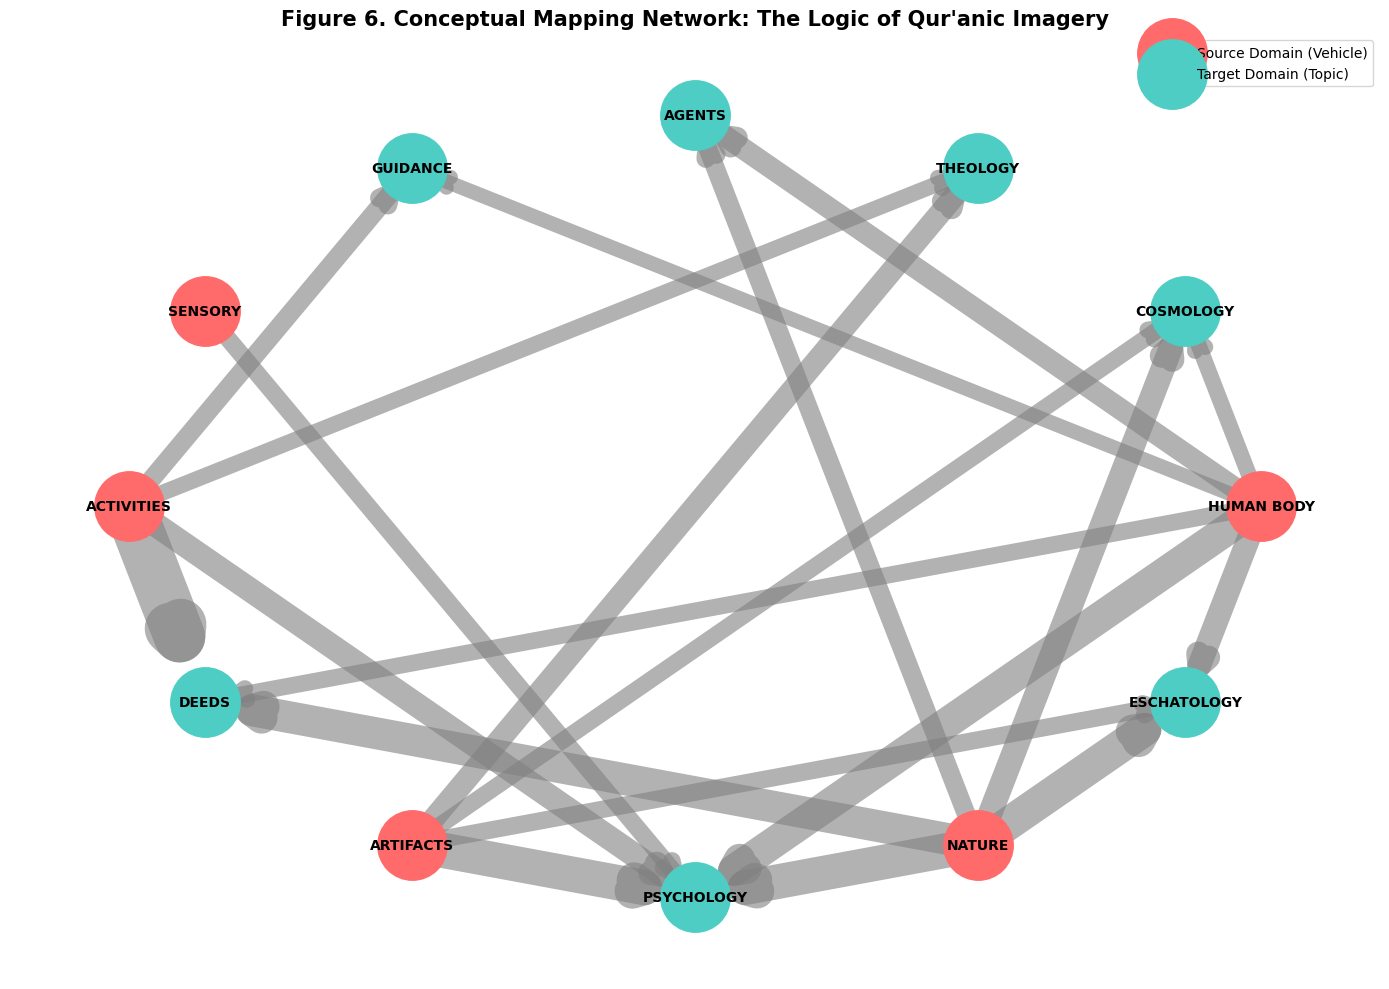


📝 [Generated Narrative for Section 4.4]:
------------------------------------------------------------
1. **Dominant Image Schema:** The analysis reveals that the **OTHER** schema is the foundational cognitive structure in the corpus.

2. **Systematic Entailment:** The strongest link connects **ACTIVITIES** to **DEEDS**.
   -> Conceptual Logic: This systematic mapping establishes the entailment that abstract deeds follows the physical laws of activities.
------------------------------------------------------------

📊 Image Schema Distribution:
Schema
OTHER                 941
CONTAINER (In-Out)      1
Name: count, dtype: int64


In [5]:
# @title تحليل الخرائط المفهومية (Network Diagram & Schema Logic)
import json
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import re
from google.colab import drive

# ---------------------------------------------------------
# 1. MOUNT & LOAD
# ---------------------------------------------------------
print("Mounting Google Drive...")
drive.mount('/content/drive')

path_similes = '/content/drive/MyDrive/Pragmatic/corpus/similes_data.json'
path_metaphors = '/content/drive/MyDrive/Pragmatic/corpus/metaphors_data.json'

# ---------------------------------------------------------
# 2. TAXONOMY & HEURISTICS (تعريف المنطق)
# ---------------------------------------------------------

# A. Domain Mappings (نفس التصنيف الموحد السابق لضمان الاتساق)
source_main_map = {
    'NATURE': 'NATURE', 'NATURE_ELEMENTS': 'NATURE', 'NATURE_METEO_HYDRO': 'NATURE',
    'LIGHT_AND_DARKNESS': 'SENSORY', 'FIRE_AND_HEAT': 'SENSORY', 'SENSORY_PHENOMENA': 'SENSORY',
    'COMMERCE_AND_EXCHANGE': 'ACTIVITIES', 'HUMAN_ACTIVITIES': 'ACTIVITIES', 'TRAVEL_AND_PATH': 'ACTIVITIES',
    'BODY_AND_PHYSIOLOGY': 'HUMAN BODY', 'HUMAN_CONDITION': 'HUMAN BODY',
    'TOOLS_AND_ARTIFACTS': 'ARTIFACTS', 'BUILDINGS_AND_SHELTER': 'ARTIFACTS', 'HUMAN_CONSTRUCTS': 'ARTIFACTS',
    'ABSTRACT_SYSTEMS': 'ABSTRACT'
}

target_main_map = {
    'THEOLOGY': 'THEOLOGY', 'REVELATION_AND_GUIDANCE': 'GUIDANCE',
    'ESCHATOLOGY': 'ESCHATOLOGY', 'SPIRITUAL_PSYCHOLOGY': 'PSYCHOLOGY',
    'HUMAN_AGENTS_AND_GROUPS': 'AGENTS', 'DEEDS_AND_BEHAVIOR': 'DEEDS',
    'WORLDLY_LIFE': 'WORLDLY LIFE', 'COSMOLOGY_AND_NATURE': 'COSMOLOGY'
}

# B. Image Schema Detector (كاشف الخطاطات التصورية)
# يبحث في النصوص العربية عن مؤشرات المسار والاحتواء والقوة
schema_keywords = {
    'PATH (Source-Path-Goal)': ['طريق', 'سبيل', 'صراط', 'مشي', 'سير', 'خطوات', 'هداية', 'ضلال', 'مرور', 'سلك'],
    'CONTAINER (In-Out)': ['في', 'داخل', 'قلب', 'صدر', 'وعاء', 'ختم', 'طبع', 'غلاف', 'بطن', 'دخول', 'خروج', 'أحاط'],
    'FORCE (Interaction)': ['ضرب', 'ثقيل', 'حمل', 'دفع', 'قوة', 'شدة', 'سلطان', 'قهر', 'أخذ', 'بطش', 'أغلال']
}

def detect_schema(text):
    if not isinstance(text, str): return None
    text = text.lower()
    for schema, keywords in schema_keywords.items():
        for kw in keywords:
            if kw in text:
                return schema
    return 'OTHER'

# ---------------------------------------------------------
# 3. DATA EXTRACTION
# ---------------------------------------------------------
rows = []

def process_file(path):
    try:
        with open(path, 'r', encoding='utf-8') as f:
            records = json.load(f)
        for rec in records:
            # Check rhetorical structure
            items = rec.get('rhetorical_analysis', {}).get('similes', [])
            if not items:
                items = rec.get('rhetorical_analysis', {}).get('metaphors', []) # Fallback for metaphor file

            for item in items:
                comps = item.get('components', {})
                # Extract Domains
                raw_s = comps.get('source_domain')
                raw_t = comps.get('target_domain')

                # Extract Text for Schema Detection (Subject + Image + Explanation)
                full_text = str(comps.get('subject', '')) + " " + str(comps.get('image', '')) + " " + str(comps.get('point_of_similarity', ''))

                # Mapping
                clean_s = None
                clean_t = None

                # Loop through maps to find substring matches or direct matches
                for k, v in source_main_map.items():
                    if raw_s and k in raw_s: clean_s = v; break
                for k, v in target_main_map.items():
                    if raw_t and k in raw_t: clean_t = v; break

                if clean_s and clean_t:
                    rows.append({
                        'Source': clean_s,
                        'Target': clean_t,
                        'Schema': detect_schema(full_text)
                    })
    except: pass

process_file(path_similes)
process_file(path_metaphors)

df = pd.DataFrame(rows)

# ---------------------------------------------------------
# 4. NETWORK VISUALIZATION (الرسم الشبكي)
# ---------------------------------------------------------
if not df.empty:
    print("\n" + "="*60)
    print("🕸️ VISUALIZATION: CONCEPTUAL MAPPING NETWORK")
    print("="*60)

    # 1. Prepare Network Data (Frequency of Pairs)
    edges = df.groupby(['Source', 'Target']).size().reset_index(name='Weight')
    # Filter weak links to clean up the graph (keep top 20 strongest links)
    edges = edges.sort_values('Weight', ascending=False).head(20)

    # 2. Build Graph
    G = nx.DiGraph() # Directed Graph (Source -> Target)

    for _, row in edges.iterrows():
        G.add_edge(row['Source'], row['Target'], weight=row['Weight'])

    # 3. Plotting
    plt.figure(figsize=(14, 10))

    # Position nodes (Circular layout is good for showing interconnectivity)
    pos = nx.shell_layout(G)

    # Draw Nodes
    sources = list(set(edges['Source']))
    targets = list(set(edges['Target']))

    nx.draw_networkx_nodes(G, pos, nodelist=sources, node_color='#FF6B6B', node_size=2500, label='Source Domains')
    nx.draw_networkx_nodes(G, pos, nodelist=targets, node_color='#4ECDC4', node_size=2500, label='Target Domains')

    # Draw Edges (Thickness based on weight)
    weights = [G[u][v]['weight'] * 0.5 for u,v in G.edges()]
    nx.draw_networkx_edges(G, pos, width=weights, edge_color='gray', alpha=0.6, arrowstyle='->', arrowsize=20)

    # Draw Labels
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold', font_family='sans-serif')

    plt.title('Figure 6. Conceptual Mapping Network: The Logic of Qur\'anic Imagery', fontsize=15, weight='bold')
    plt.axis('off')
    # Custom Legend
    plt.legend(['Source Domain (Vehicle)', 'Target Domain (Topic)'], loc='upper right')
    plt.tight_layout()
    plt.show()

    # ---------------------------------------------------------
    # 5. SCHEMA ANALYSIS & NARRATIVE
    # ---------------------------------------------------------
    schema_counts = df['Schema'].value_counts()

    print("\n📝 [Generated Narrative for Section 4.4]:")
    print("-" * 60)

    # Logic 1: Dominant Schema
    top_schema = schema_counts.index[0] if not schema_counts.empty else "N/A"
    print(f"1. **Dominant Image Schema:** The analysis reveals that the **{top_schema}** schema is the foundational cognitive structure in the corpus.")
    if top_schema == 'CONTAINER (In-Out)':
        print("   -> Implication: The Qur'an conceptualizes spiritual states (Faith/Kufr) as physical spaces one enters or leaves, entailing a logic of 'exclusion' and 'inclusion'.")
    elif top_schema == 'PATH (Source-Path-Goal)':
        print("   -> Implication: The Qur'an conceptualizes Religion as a journey, entailing a logic of 'progress', 'deviation', and 'destination'.")

    # Logic 2: Systematic Mappings (from Graph)
    top_edge = edges.iloc[0]
    print(f"\n2. **Systematic Entailment:** The strongest link connects **{top_edge['Source']}** to **{top_edge['Target']}**.")
    print(f"   -> Conceptual Logic: This systematic mapping establishes the entailment that abstract {top_edge['Target'].lower()} follows the physical laws of {top_edge['Source'].lower()}.")

    print("-" * 60)

    # Print Schema Stats for verification
    print("\n📊 Image Schema Distribution:")
    print(schema_counts)

else:
    print("⚠️ No data available for network analysis.")

In [6]:
# @title استخراج الأرقام للجداول (Data Extraction for Section 4.4)
import json
import pandas as pd
from google.colab import drive

# 1. Mount & Load
print("Mounting Google Drive...")
drive.mount('/content/drive')

path_similes = '/content/drive/MyDrive/Pragmatic/corpus/similes_data.json'
path_metaphors = '/content/drive/MyDrive/Pragmatic/corpus/metaphors_data.json'

# 2. Define Mappings (نفس التصنيف الموحد)
source_main_map = {
    'NATURE': 'NATURE', 'NATURE_ELEMENTS': 'NATURE', 'NATURE_METEO_HYDRO': 'NATURE', 'NATURE_FLORA': 'NATURE', 'NATURE_FAUNA': 'NATURE',
    'LIGHT_AND_DARKNESS': 'SENSORY PHENOMENA', 'FIRE_AND_HEAT': 'SENSORY PHENOMENA', 'SOUND_AND_VOICE': 'SENSORY PHENOMENA',
    'SENSORY_PHENOMENA': 'SENSORY PHENOMENA', 'SENSORY_PHENOMENA_LIGHT_AND_DARKNESS': 'SENSORY PHENOMENA', 'SENSORY_PHENOMENA_FIRE_AND_HEAT': 'SENSORY PHENOMENA',
    'COMMERCE_AND_EXCHANGE': 'HUMAN ACTIVITIES', 'HUMAN_ACTIVITIES': 'HUMAN ACTIVITIES', 'TRAVEL_AND_PATH': 'HUMAN ACTIVITIES',
    'AGRICULTURE_LABOR': 'HUMAN ACTIVITIES', 'HUMAN_ACTIVITIES_COMMERCE_AND_EXCHANGE': 'HUMAN ACTIVITIES', 'HUMAN_ACTIVITIES_TRAVEL_AND_PATH': 'HUMAN ACTIVITIES', 'HUMAN_ACTIVITIES_WAR_AND_CONFLICT': 'HUMAN ACTIVITIES', 'WAR_AND_CONFLICT': 'HUMAN ACTIVITIES',
    'BUILDINGS_AND_SHELTER': 'HUMAN CONSTRUCTS', 'CLOTHING_AND_ADORNMENT': 'HUMAN CONSTRUCTS', 'TOOLS_AND_ARTIFACTS': 'HUMAN CONSTRUCTS', 'HUMAN_CONSTRUCTS': 'HUMAN CONSTRUCTS', 'HUMAN_CONSTRUCTS_TOOLS_AND_ARTIFACTS': 'HUMAN CONSTRUCTS',
    'BODY_AND_PHYSIOLOGY': 'HUMAN CONDITION', 'FAMILY_AND_SOCIETY': 'HUMAN CONDITION', 'PSYCHOLOGY_AND_EMOTION': 'HUMAN CONDITION', 'HUMAN_CONDITION': 'HUMAN CONDITION', 'HUMAN_CONDITION_BODY_AND_PHYSIOLOGY': 'HUMAN CONDITION', 'HUMAN_CONDITION_FAMILY_AND_SOCIETY': 'HUMAN CONDITION', 'HUMAN_CONDITION_PSYCHOLOGY_AND_EMOTION': 'HUMAN CONDITION',
    'ABSTRACT_SYSTEMS': 'ABSTRACT SYSTEMS', 'DIVINE_LAWS': 'ABSTRACT SYSTEMS', 'HISTORY_AND_TRADITION': 'ABSTRACT SYSTEMS', 'ABSTRACT_SYSTEMS_DIVINE_LAWS': 'ABSTRACT SYSTEMS', 'ABSTRACT_SYSTEMS_HISTORY_AND_TRADITION': 'ABSTRACT SYSTEMS'
}

target_main_map = {
    'THEOLOGY': 'THEOLOGY',
    'REVELATION_AND_GUIDANCE': 'REVELATION & GUIDANCE',
    'ESCHATOLOGY': 'ESCHATOLOGY',
    'SPIRITUAL_PSYCHOLOGY': 'SPIRITUAL PSYCHOLOGY',
    'HUMAN_AGENTS_AND_GROUPS': 'HUMAN AGENTS',
    'DEEDS_AND_BEHAVIOR': 'DEEDS & BEHAVIOR',
    'WORLDLY_LIFE': 'WORLDLY LIFE',
    'COSMOLOGY_AND_NATURE': 'COSMOLOGY'
}

# 3. Schema Logic
schema_keywords = {
    'PATH (Journey Logic)': ['طريق', 'سبيل', 'صراط', 'مشي', 'سير', 'خطوات', 'هداية', 'ضلال', 'مرور', 'سلك', 'تيه', 'وصول'],
    'CONTAINER (Enclosure Logic)': ['في', 'داخل', 'قلب', 'صدر', 'وعاء', 'ختم', 'طبع', 'غلاف', 'بطن', 'دخول', 'خروج', 'أحاط', 'ظرف', 'مأوى'],
    'FORCE (Interaction Logic)': ['ضرب', 'ثقيل', 'حمل', 'دفع', 'قوة', 'شدة', 'سلطان', 'قهر', 'أخذ', 'بطش', 'أغلال', 'جذب', 'نزع']
}

def detect_schema(text):
    if not isinstance(text, str): return 'OTHER'
    text = text.lower()
    for schema, keywords in schema_keywords.items():
        for kw in keywords:
            if kw in text:
                return schema
    return 'OTHER'

# 4. Process Data
rows = []
def process_file(path):
    try:
        with open(path, 'r', encoding='utf-8') as f:
            records = json.load(f)
        for rec in records:
            items = rec.get('rhetorical_analysis', {}).get('similes', [])
            if not items: items = rec.get('rhetorical_analysis', {}).get('metaphors', [])

            for item in items:
                comps = item.get('components', {})
                raw_s = comps.get('source_domain')
                raw_t = comps.get('target_domain')

                # النص للكشف عن الخطاطة (نجمع كل النصوص الوصفية)
                full_text = str(comps.get('subject', '')) + " " + str(comps.get('image', '')) + " " + str(comps.get('point_of_similarity', '')) + " " + str(item.get('simile_identity', {}).get('segment_text', ''))

                clean_s = source_main_map.get(raw_s)
                clean_t = target_main_map.get(raw_t)

                if clean_s and clean_t:
                    rows.append({
                        'Source': clean_s,
                        'Target': clean_t,
                        'Schema': detect_schema(full_text)
                    })
    except Exception as e: print(f"Error reading file: {e}")

process_file(path_similes)
process_file(path_metaphors)
df = pd.DataFrame(rows)

# 5. PRINT RESULTS TABLES
if not df.empty:
    print("\n" + "="*60)
    print("📊 DATA FOR SECTION 4.4 (COPY THIS)")
    print("="*60)

    # Table 1: Top Mappings (The "Edges" of the Network)
    print("\n1. SYSTEMATIC MAPPINGS (Top Source -> Target Pairs):")
    mapping_counts = df.groupby(['Source', 'Target']).size().reset_index(name='Count')
    mapping_counts['Percentage'] = (mapping_counts['Count'] / len(df) * 100).round(1)
    top_mappings = mapping_counts.sort_values('Count', ascending=False).head(10)
    print(top_mappings.to_string(index=False))

    # Table 2: Image Schema Distribution
    print("\n2. IMAGE SCHEMA LOGIC (Cognitive Structures):")
    schema_counts = df['Schema'].value_counts()
    schema_pct = df['Schema'].value_counts(normalize=True) * 100
    schema_df = pd.DataFrame({'Count': schema_counts, 'Percentage': schema_pct.round(1)})
    print(schema_df.to_string())

    print("\n" + "="*60)
else:
    print("No data found.")

Mounting Google Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

📊 DATA FOR SECTION 4.4 (COPY THIS)

1. SYSTEMATIC MAPPINGS (Top Source -> Target Pairs):
          Source               Target  Count  Percentage
HUMAN ACTIVITIES     DEEDS & BEHAVIOR    111         7.9
 HUMAN CONDITION SPIRITUAL PSYCHOLOGY     79         5.6
 HUMAN CONDITION         HUMAN AGENTS     67         4.8
HUMAN CONSTRUCTS SPIRITUAL PSYCHOLOGY     67         4.8
 HUMAN CONDITION          ESCHATOLOGY     58         4.1
 HUMAN CONDITION            COSMOLOGY     50         3.6
          NATURE SPIRITUAL PSYCHOLOGY     50         3.6
          NATURE          ESCHATOLOGY     48         3.4
 HUMAN CONDITION     DEEDS & BEHAVIOR     46         3.3
HUMAN ACTIVITIES SPIRITUAL PSYCHOLOGY     46         3.3

2. IMAGE SCHEMA LOGIC (Cognitive Structures):
                             Count  Percentage
Schema                             